# MATH5271 Environmental Data Science and Statistics



## Week 2: Statistical Forecasting



Welcome to Week 2 of MATH5271. In this session we will discuss Statistical Forecasting. By the end of this session you should understand:

- General concepts of statistical versus process based model forecasting;
- Important mathematical aspects of simple statistical forecasting;
- How process based and statistical models are integrated to generate useful forecasts.

## About these notes

I plan to make some lectures using an extension to Python based Jupyter Notebooks called [Rise](https://rise.readthedocs.io/en/stable/). I will give access to the code. This will mean you can see the calculations I have carried out and reproduce them yourselves. 


## Setup and Load Data

Before we get started we need to ensure we have the appropriate 'libraries' are installed. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) package to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. 

In [2]:
# import libraries
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline

# Define the URL where the data set is stored
TableA1_url = 'https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_TableA1.csv' 

# Import the data set as a Pandas Dataframe using the 'read_csv' function
df1 = pd.read_csv(TableA1_url)

## Forecasting

When forecasting, we aim to make a predictions, $\hat{y}$, of the value of a specific 'predictand' $y_i$, as a function of a set of predictors ${\bf x}_i$ such that

$$y_i = \hat{y}({\bf x}_i)+e_i.$$

Above, $e_i$ is the error between the prediction and predictand and $\hat{y}$ is designed so that $e_i$ is as small as possible. Although $e_i$ is (of course) unknown a priori, its statistical properties are of as much interest as the central prediction.

## Statistical Forecasting vs What?

Statistical forecasting involves developing the function $\hat{y}$ and determining the nature of $e$ based on some prior knowledge of $y_i$ and $\bf{x}_i$. (These are often called ‘training’ data.)


What are alternative approaches and when/how are the different approaches applicable?

Examples: 
- Arrival time of a Tsunami;
- Number of Orange Bellied Parrots arriving for summer in Tasmania;
- Possibility of a La Niña in 2023.


![NINOForecast.png](https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%202/NINOForecast.png)
Infographic adapted by Elisabeth Gawthrop from figure by Tony Barnston.

### Linear Regression
linear regression is a simple example of a forecasting system. For a predictor $x_i$ we have

$$ y_i = a + b x_i +  e_i.$$

In this case we can simply calculate the slope $b$ and the intercept $a$ using

$$ b = \frac{\sum_{i=1}^n \left[ (x_i - \overline{x})((y_i - \overline{y})\right]}{\sum_{i=1}^n (x_i - \overline{x})^2} \,\, \text{and}\,\, a = \overline{y} - b \overline{x}.$$


This is garaunteed to minimise the mean of the square of the residuals 

$$ s_e^2 = \frac{1}{n-2}\sum_{i=1}^n e_i^2.$$

Let's recreate this relationship based on Wilk's Ithaca and Canandaigua minimum temperatures.

In [3]:
# Subset just the Ithaca and Canandaigua data
idf = df1[df1['Location'].isin(['Ithaca'])]
x = idf.MinTemp_Far.values
cdf = df1[df1['Location'].isin(['Canandaigua'])]
y = cdf.MinTemp_Far.values
n = x.shape[0]

In [4]:
# Calculate b and a
b = (n*np.sum(x*y)-np.sum(x)*np.sum(y))\
/(n*np.sum(x**2)-((np.sum(x))**2))
a = y.mean() - b*x.mean()
# Determine the least squares guess at 'y' (the Canandaigua temperature)
y_lr = a + b*x;

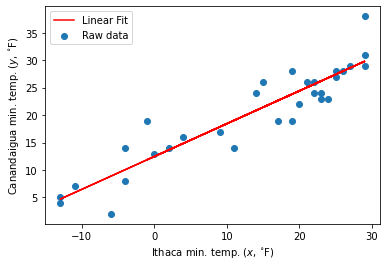

In [4]:
# Make the plot using matplotlib (plt)
plt.scatter(x,y,label='Raw data');
plt.plot(x,y_lr,'r',label='Linear Fit')
plt.xlabel('Ithaca min. temp. ($x$, $^{\circ}$F)')
plt.ylabel('Canandaigua min. temp. ($y$, $^{\circ}$F)')
plt.legend()

This reveals the kind of relationship we were after. Now let's take a closer look at the uncertainty. 

The mean square of the resudials or MSE is often used as an estimate of the uncertainty but in fact we need to use the prediction variance which is

$$ s^2_{\hat{y}} = s_e^2\left[ 1 + \frac{1}{n} + \frac{(x_0 - \overline{x})^2}{\sum_{i=1}^n(x_i - \overline{x})^2}\right].$$


We can also determine the uncertainty in the fit line itself via the 'variance of the conditional mean'

$$ s^2_{\hat{y}|x_0} = s_e^2\left[\frac{1}{n} + \frac{(x_0 - \overline{x})^2}{\sum_{i=1}^n(x_i - \overline{x})^2}\right].$$

Text(0, 0.5, 'Canandaigua min. temp. ($y$, $^{\\circ}$F)')

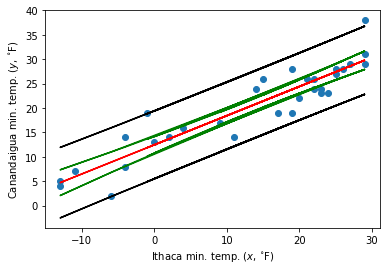

In [5]:
# Determine the mean square error, the prediciton variance and variance of the 
# conditional mean
se2  = (1/(n-2))*sum((y-y_lr)**2)
sy2 = se2*(1+ (1/n) + (x-x.mean())**2/(sum((x-x.mean())**2)))
syx02 = se2*((1/n) + (x-x.mean())**2/(sum((x-x.mean())**2)))
# Plot
plt.scatter(x,y)
plt.plot(x,y_lr,'r')
plt.plot(x,y_lr+1.96*np.sqrt(sy2),'k',x,y_lr-1.96*np.sqrt(sy2),'k')
plt.plot(x,y_lr+1.96*np.sqrt(syx02),'g',x,y_lr-1.96*np.sqrt(syx02),'g')
plt.xlabel('Ithaca min. temp. ($x$, $^{\circ}$F)')
plt.ylabel('Canandaigua min. temp. ($y$, $^{\circ}$F)')

## Multiple Linear Regression
Multiple linear regression allows for multiple ($K$) predictors 

$$ \hat{y}(x_1,x_2,x_K) = b_0 + b_1 x_1 +  b_2 x_2 + ... + b_K x_K$$

Furthermore, $x_i$ can be a ‘derived’ predictor variable such as $x^i$. This special case is a polynomial fit.

$$ \hat{y}(x) = b_0 + b_1 x +  b_2 x^2 + ... + b_K x^K$$

The model itself is ‘non-linear’ but the regression is linear since we are just looking for the coefficients $b_i$.

## How to do multiple linear regression
Python packages such as numpy have various inbuilt functions such as 'polyfit' for fitting polynomials and similar special cases. If we want to use mupltiple predictors then it is more general to set the problem up in matrix form such that

$$ \text{X} \bf{b} = \bf{y} $$

where $\text{A}$ is a K by n matrix of predictors, $\bf{b}$ are the K unknown regression parameters and $\bf{y}$ are the $n$ observations $y_i$. If n>K the inversion $\bf{b} = \text{X}^{-1} \bf{y} $ is solved using least squares.

In [5]:
#Solve our simple linear fit using numpy's 'polyfit':
[b_poly,a_poly] =  np.polyfit(x,y,1)

#Solve using linear algebra:
#Make a 2 by n matrix with 1s as the first column and the predictor x as the second
X = np.array([1+0*x,x]).transpose()
# Now we have A b = y and we can use numpy's 'linalg.lstsq' function
bmat  = np.linalg.lstsq(X,y,rcond=None)

#Compare direct, polyfit and matrix approaches
print(a,b)
print(a_poly,b_poly)
print(bmat[0][0],bmat[0][1])

12.459451311425987 0.597411933860532
12.459451311425983 0.5974119338605315
12.459451311425994 0.597411933860532


## Analysis of variance and 'goodness' of fit

![ANOVAtable.png](https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%202/ANOVAtable.png)

$$ R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$


## Nonlinear Regression
We can also do operations on the left hand side such as for ’Poisson Regression’  

$$ \ln(\hat{y}) = b_0 + b_1 x_1 +  b_2 x_2 + ... + b_K x_K$$

or 'Logistic Regression'

$$ \ln(\hat{y}/(1-\hat{y})) = b_0 + b_1 x_1 +  b_2 x_2 + ... + b_K x_K.$$

Since we know the LHS and RHS can we simply solve this using the methods above?


## What do these functions look like?



## Where might each be useful?

## Other Considerations?
![scattererror.png](https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%202/scattererror.png)

## Predictor Selection

Why not use all available data to make a fit? What should be done instead?

![predictorselection.png](https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%202/predictorselection.png)

## Predictor Selection

Why not use all available data to make a fit? What should be done instead?

<div>
<img src="https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%202/predictorselection.png" width="400"/>
</div>


![predictselect2.png](https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%202/predictselect2.png)

## Process Based Model Forecasts

![NWP.png](https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%202/NWP.png)

https://www.youtube.com/watch?v=QrGrbiHBmWg&t=121s

Process Based Model Forecasts

![NWP2.png](https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%202/NWP2.png)

## Perfect Prog and MOS

Classic Forecasting: $\hat{y}_t = f_C(\bf{x}_0)$

Prefect Prog: 

$\hat{y}_0 = f_{PP}(\bf{x}_0)$ (development) and

$\hat{y}_t = f_{PP}(\bf{x}_t)$ (implementation).

Model Output Statistics (MOS): 

$\hat{y}_t = f_{MOS}(\bf{x}_t)$

## Perfect Prog and MOS

<div>
<img src="https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%202/ProgMOS.png" width="500"/>
</div>

## Perfect Prog and MOS

![ProgMOS.png](https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%202/ProgMOS.png)

## Ensemble forecasts and data assimilation

![ensforecast.png](https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%202/ensforecast.png)

A schematic representation of the data assimilation process from [Apte A. (2015) An Introduction to Data Assimilation](doi.org/10.1007/978-81-322-2547-8_4)


## Summary

We have discussed:

*   How linear regression works and how to do it in python;
* Some aspects of nonlinear regression and overfitting;
* How statistical forecasts can be combined with process based forecasts.
